### Sentiment Analysis


In [151]:
!pip install textblob
import pandas as pd
import numpy as np
import re 
from textblob import TextBlob 

In [152]:
ceo_tweets=pd.read_csv('ceo_tweets_api.csv')
ceo_tweets[:5]

,Index,username,id,date,tweet,company
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,Tomorrow the incredible @MNightShyamalan’s ser...,apple
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,Thanksgiving Day challenge! Close your rings w...,apple
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,As many of you travel to be with loved ones to...,apple
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,The construction of our new Austin campus is u...,apple
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,It’s incredible to see how Salesforce and thei...,apple


In [154]:
### Replace some terms like t-mobile with tmobile, @<company>: company 

unq_company=np.unique(ceo_tweets['company'])
unq_company

def comp_name_clean(tweet):
    
    for i in range(len(unq_company)):
        temp='@'+unq_company[i]
        #if(tweet.find(temp)> 0):
           # print(tweet.replace(temp, unq_company[i]),"^^^^",tweet)
        tweet=tweet.replace(temp, unq_company[i])
    return tweet
    
ceo_tweets['tweet']=ceo_tweets['tweet'].map(comp_name_clean)
ceo_tweets[:5]


## or should we just keep all the @ ????

,Index,username,id,date,tweet,company
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,Tomorrow the incredible @MNightShyamalan’s ser...,apple
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,Thanksgiving Day challenge! Close your rings w...,apple
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,As many of you travel to be with loved ones to...,apple
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,The construction of our new Austin campus is u...,apple
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,It’s incredible to see how Salesforce and thei...,apple


In [155]:
# Clean the tweets

def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

In [156]:
ceo_tweets['clean_tweets']=ceo_tweets['tweet'].map(clean_tweet)
ceo_tweets['tweet']=ceo_tweets['tweet'].map(str.lower)
ceo_tweets[:5]


,Index,username,id,date,tweet,company,clean_tweets
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,tomorrow the incredible @mnightshyamalan’s ser...,apple,Tomorrow the incredible ’s series premieres on...
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,thanksgiving day challenge! close your rings w...,apple,Thanksgiving Day challenge Close your rings wi...
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,as many of you travel to be with loved ones to...,apple,As many of you travel to be with loved ones to...
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,the construction of our new austin campus is u...,apple,The construction of our new Austin campus is u...
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,it’s incredible to see how salesforce and thei...,apple,It’s incredible to see how Salesforce and thei...


In [158]:
# Sentiment Analysis function:

def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        return analysis.sentiment.polarity
        
def sentiment_buckets(score):
        # set sentiment : 5% offset
        if score > 0.05: 
            return 'positive'
        elif score < -0.05: 
            return 'negative'
        else: 
            return 'neutral'

In [159]:

ceo_tweets['sentiment_score']=ceo_tweets['clean_tweets'].map(get_tweet_sentiment)
ceo_tweets['sentiment_bucket']=ceo_tweets['sentiment_score'].map(sentiment_buckets)
ceo_tweets[:5]


,Index,username,id,date,tweet,company,clean_tweets,sentiment_score,sentiment_bucket
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,tomorrow the incredible @mnightshyamalan’s ser...,apple,Tomorrow the incredible ’s series premieres on...,0.900000,positive
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,thanksgiving day challenge! close your rings w...,apple,Thanksgiving Day challenge Close your rings wi...,0.000000,neutral
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,as many of you travel to be with loved ones to...,apple,As many of you travel to be with loved ones to...,0.550000,positive
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,the construction of our new austin campus is u...,apple,The construction of our new Austin campus is u...,0.136364,positive
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,it’s incredible to see how salesforce and thei...,apple,It’s incredible to see how Salesforce and thei...,0.425000,positive


### Sentiment EDA:

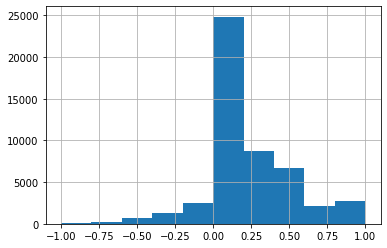

In [160]:
# sentiment EDA :

ceo_tweets['sentiment_score'].hist()


In [161]:
# CEO level sentiment EDA:

ceo_tweets.groupby('username')['sentiment_score'].agg(['min','max','mean','median'])

,min,max,mean,median
username,,,,
@Benioff,-1.000000,1.0,0.179008,0.100000
@BillGates,-1.000000,1.0,0.221903,0.178348
@Bill_Gross,-1.000000,1.0,0.206299,0.168182
@BoeingCEO,-0.500000,1.0,0.288584,0.250000
@JohnLegere,-1.000000,1.0,0.191314,0.000000
@MichaelDell,-1.000000,1.0,0.241516,0.166667
@WaltBettinger,-1.000000,1.0,0.284270,0.250000
@anandmahindra,-0.800000,1.0,0.180260,0.080000
@bchesky,-1.000000,1.0,0.179380,0.068182


In [162]:
df_sent_bucket=pd.DataFrame(ceo_tweets.groupby(['username','sentiment_bucket'])['sentiment_score'].agg('count'))

df_sent_bucket=df_sent_bucket.reset_index()
df_sent_bucket.columns=['username','sentiment_bucket','tweet_cnt']
df_sent_bucket[:5]



,username,sentiment_bucket,tweet_cnt
0,@Benioff,negative,252
1,@Benioff,neutral,1239
2,@Benioff,positive,1709
3,@BillGates,negative,272
4,@BillGates,neutral,967


In [163]:
#pivot the results
df_sent_pivot= pd.pivot_table(df_sent_bucket,index=["username"],columns=["sentiment_bucket"])
df_sent_pivot['perc_negative']=df_sent_pivot['tweet_cnt']['negative']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])
df_sent_pivot['perc_positive']=df_sent_pivot['tweet_cnt']['positive']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])
df_sent_pivot['perc_neutral']=df_sent_pivot['tweet_cnt']['neutral']*100/(df_sent_pivot['tweet_cnt']['negative']+df_sent_pivot['tweet_cnt']['positive']+df_sent_pivot['tweet_cnt']['neutral'])


df_sent_pivot

tweet_cnt                  perc_negative perc_positive  \
sentiment_bucket  negative neutral positive                               
username                                                                  
@Benioff               252    1239     1709      7.875000     53.406250   
@BillGates             272     967     1977      8.457711     61.473881   
@Bill_Gross            297     963     1979      9.169497     61.099105   
@BoeingCEO              10     101      339      2.222222     75.333333   
@JohnLegere            143    1821     1254      4.443754     38.968303   
@MichaelDell           102    1210     1877      3.198495     58.858576   
@WaltBettinger          85     417     1097      5.315822     68.605378   
@anandmahindra         239    1321     1645      7.457098     51.326053   
@bchesky               229    1345     1607      7.198994     50.518705   
@eldsjal               220    1448     1520      6.900878     47.678795   
@elonmusk              299    1623     1324      9.211337     40.788663   
@ericschmidt            55     247      517      6.715507     63.125763   
@kevinrose             360    1185     1676     11.176653     52.033530   
@levie                 536    1195     1487     16.656308     46.208825   
@lloydblankfein         11      21       36     16.176471     52.941176   
@marissamayer           72     514      826      5.099150     58.498584   
@richardbranson        224     860     2123      6.984721     66.198940   
@rupertmurdoch         314     419      983     18.298368     57.284382   
@satyanadella           46     377      618      4.418828     59.365994   
@tim_cook               43     246      628      4.689204     68.484188   
@tonyfernandes         276    1166     1745      8.660182     54.753687   

                 perc_neutral  
sentiment_bucket               
username                       
@Benioff            38.718750  
@BillGates          30.068408  
@Bill_Gross         29.731399  
@BoeingCEO          22.444444  
@JohnLegere         56.587943  
@MichaelDell        37.942929  
@WaltBettinger      26.078799  
@anandmahindra      41.216849  
@bchesky            42.282301  
@eldsjal            45.420326  
@elonmusk           50.000000  
@ericschmidt        30.158730  
@kevinrose          36.789817  
@levie              37.134866  
@lloydblankfein     30.882353  
@marissamayer       36.402266  
@richardbranson     26.816339  
@rupertmurdoch      24.417249  
@satyanadella       36.215178  
@tim_cook           26.826609  
@tonyfernandes      36.586131

### Bag of words analysis

In [164]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
from nltk import pos_tag, word_tokenize
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [165]:
## Removing stop words, punctuation and tokenizing

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

ceo_tweets["clean_tweets"] = ceo_tweets["clean_tweets"].astype(str)
ceo_tweets["tweet_tokens"] = ceo_tweets["clean_tweets"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
ceo_tweets["tweet_tokens"] = ceo_tweets["tweet_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

ceo_tweets[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Index,username,id,date,tweet,company,clean_tweets,sentiment_score,sentiment_bucket,tweet_tokens
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,tomorrow the incredible @mnightshyamalan’s ser...,apple,Tomorrow the incredible ’s series premieres on...,0.900000,positive,"[tomorrow, incredible, series, premieres, appl..."
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,thanksgiving day challenge! close your rings w...,apple,Thanksgiving Day challenge Close your rings wi...,0.000000,neutral,"[thanksgiving, day, challenge, close, rings, f..."
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,as many of you travel to be with loved ones to...,apple,As many of you travel to be with loved ones to...,0.550000,positive,"[many, travel, loved, ones, today, remember, p..."
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,the construction of our new austin campus is u...,apple,The construction of our new Austin campus is u...,0.136364,positive,"[construction, new, austin, campus, underway, ..."
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,it’s incredible to see how salesforce and thei...,apple,It’s incredible to see how Salesforce and thei...,0.425000,positive,"[incredible, see, salesforce, passionate, deve..."


#### In How many comments, the company name is mentioned?

In [167]:
ceo_tweets['comp_mention_flag'] = ceo_tweets.apply(lambda x: x.company in x.tweet, axis=1)
ceo_tweets[:5]

,Index,username,id,date,tweet,company,clean_tweets,sentiment_score,sentiment_bucket,tweet_tokens,comp_mention_flag
0,0,@tim_cook,1.200000e+18,11/28/2019 2:09,tomorrow the incredible @mnightshyamalan’s ser...,apple,Tomorrow the incredible ’s series premieres on...,0.900000,positive,"[tomorrow, incredible, series, premieres, appl...",True
1,1,@tim_cook,1.200000e+18,11/28/2019 0:59,thanksgiving day challenge! close your rings w...,apple,Thanksgiving Day challenge Close your rings wi...,0.000000,neutral,"[thanksgiving, day, challenge, close, rings, f...",False
2,2,@tim_cook,1.200000e+18,11/27/2019 19:09,as many of you travel to be with loved ones to...,apple,As many of you travel to be with loved ones to...,0.550000,positive,"[many, travel, loved, ones, today, remember, p...",False
3,3,@tim_cook,1.200000e+18,11/20/2019 13:15,the construction of our new austin campus is u...,apple,The construction of our new Austin campus is u...,0.136364,positive,"[construction, new, austin, campus, underway, ...",False
4,4,@tim_cook,1.200000e+18,11/19/2019 23:05,it’s incredible to see how salesforce and thei...,apple,It’s incredible to see how Salesforce and thei...,0.425000,positive,"[incredible, see, salesforce, passionate, deve...",False


In [168]:
df_mention=ceo_tweets.groupby(['username','comp_mention_flag'])['tweet'].count()
df_mention.reset_index(inplace=True)
df_mention.columns=['username']

username         comp_mention_flag
@Benioff         False                3199
                 True                    1
@BillGates       False                3195
                 True                   21
@Bill_Gross      False                3189
                 True                   50
@BoeingCEO       False                 207
                 True                  243
@JohnLegere      False                2078
                 True                 1140
@MichaelDell     False                1275
                 True                 1914
@WaltBettinger   False                1583
                 True                   16
@anandmahindra   False                3205
@bchesky         False                1917
                 True                 1264
@eldsjal         False                2356
                 True                  832
@elonmusk        False                2340
                 True                  906
@ericschmidt     False                 653
                 Tr

#### Instgram followers, following , posts (for influence score)



In [175]:
#Function to get instagram info for the CEOs

import requests
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json

df_insta=pd.DataFrame(columns=['insta_user','insta_followers','insta_following','insta_posts'])

def get_insta_info(url):
        html = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(html, 'html.parser')
        data = soup.find_all('meta', attrs={'property': 'og:description'
                             })
        text = data[0].get('content').split()
        user = '%s %s %s' % (text[-3], text[-2], text[-1])
        followers = text[0]
        following = text[2]
        posts = text[4]
        print ('User:', user)
        print ('Followers:', followers)
        print ('Following:', following)
        print ('Posts:', posts)
        print ('---------------------------')
        df_insta.loc[len(df_insta)]=[user,followers,following,posts]
        print(df_insta)
        

get_insta_info('https://www.instagram.com/thisisbillgates/')




User: Bill Gates (@thisisbillgates)
Followers: 4.1m
Following: 32
Posts: 130
---------------------------
                            user followers following posts
0  Bill Gates (@thisisbillgates)      4.1m        32   130


### Twitter followers and #posts info